In [ ]:
import sys, os
sys.path.append(os.path.abspath(".."))
from micrograd.engine import Value
from micrograd.layers import MLP
from micrograd.loss import ce_loss
from micrograd.optimizers import SGD
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
SEED = 38

In [ ]:
from sklearn.datasets import make_circles

xs, ys = make_circles(400, noise=0.03, random_state=SEED)
print(xs[:5])
print(ys[:5])

[[ 0.18595845 -0.7532009 ]
 [-0.84328859 -0.54394744]
 [-0.01473523  0.80675927]
 [-0.45892781 -0.6541523 ]
 [ 0.67944333 -0.42807743]]
[1 0 1 1 1]


In [3]:
circles = pd.DataFrame({"x1": xs[:, 0], "x2": xs[:, 1], "label":ys})
circles.head(20)

,x1,x2,label
0,0.185958,-0.753201,1
1,-0.843289,-0.543947,0
2,-0.014735,0.806759,1
3,-0.458928,-0.654152,1
4,0.679443,-0.428077,1
5,-0.224151,0.772929,1
6,-0.416442,0.938036,0
7,0.749598,0.048079,1
8,-0.967390,0.189571,0
9,0.755066,0.626188,0


In [4]:
circles.label.value_counts()

label
1    250
0    250
Name: count, dtype: int64

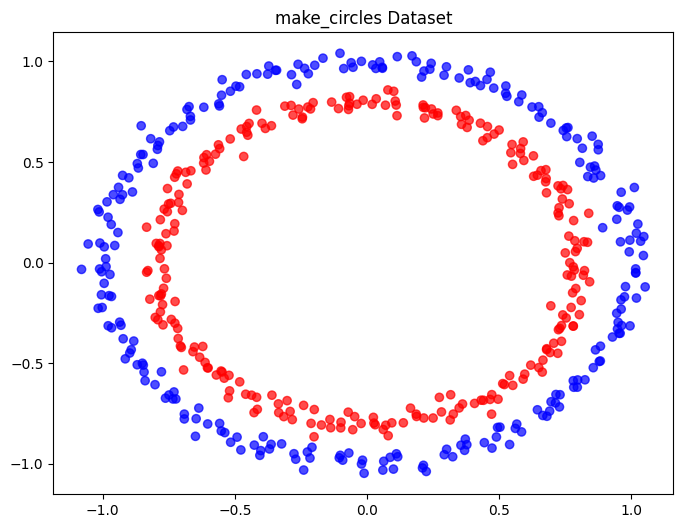

In [5]:
# Plotting data before training
# Our task is to classify each of these cirlces into either red or blue label
plt.figure(figsize=(8,6))
plt.scatter(xs[:,0], xs[:,1], c=ys, cmap='bwr', alpha=0.7)
plt.title("make_circles Dataset")
plt.show()

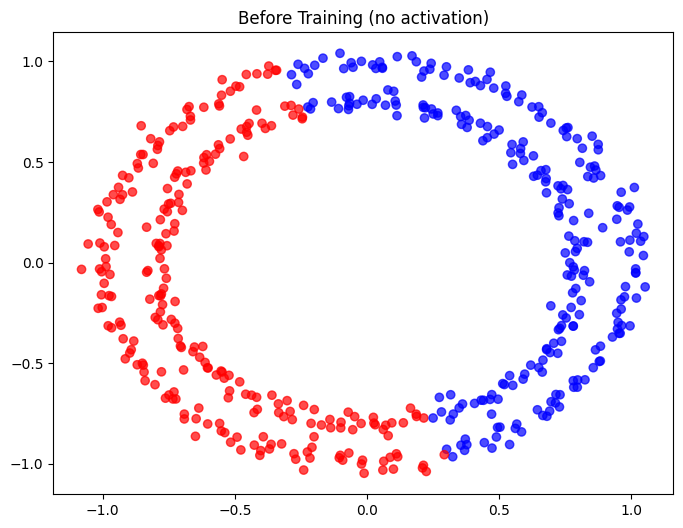

Accuracy: 0.504


In [ ]:
# Initializing model with no activation function
random.seed(SEED)
model_lin = MLP(2, [32, 32, 2], activation=None)
params_lin = model_lin.parameters()
optimizer = SGD(params_lin, lr=0.05)

# Before training
preds = [model_lin([Value(xi) for xi in x]) for x in xs]
before_preds = [np.argmax([p.data for p in pred]) for pred in preds]

plt.figure(figsize=(8,6))
plt.scatter(xs[:,0], xs[:,1], c=before_preds, cmap='bwr', alpha=0.7)
plt.title("Before Training (no activation)")
plt.show()

accuracy = np.mean(before_preds == ys)
print(f"Accuracy: {accuracy}")

In [7]:
# Training loop
for epoch in range(100):
    preds = [model_lin([Value(xi) for xi in x]) for x in xs]
    loss = ce_loss(preds, ys)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    print(f"Epoch: {epoch} || Loss: {loss.data}")
    if epoch % 10 == 0:
        accuracy = np.mean([np.argmax([p.data for p in pred]) for pred in preds] == ys)
        print(f"Accuracy: {accuracy}")

Epoch: 0 || Loss: 3.051758001232295
Accuracy: 0.504
Epoch: 1 || Loss: 0.8703377324260104
Epoch: 2 || Loss: 1.633859151432815
Epoch: 3 || Loss: 1.8125463117362972
Epoch: 4 || Loss: 1.6536922668354415
Epoch: 5 || Loss: 1.7093836147175958
Epoch: 6 || Loss: 1.6302819825269665
Epoch: 7 || Loss: 1.6351787692404458
Epoch: 8 || Loss: 1.5898669026008654
Epoch: 9 || Loss: 1.5755530038082168
Epoch: 10 || Loss: 1.5440120291813046
Accuracy: 0.504
Epoch: 11 || Loss: 1.523474821489544
Epoch: 12 || Loss: 1.4977093288451533
Epoch: 13 || Loss: 1.475808060642514
Epoch: 14 || Loss: 1.4528957063676173
Epoch: 15 || Loss: 1.4312690282069342
Epoch: 16 || Loss: 1.410200428380804
Epoch: 17 || Loss: 1.3893502421522097
Epoch: 18 || Loss: 1.3697600587914813
Epoch: 19 || Loss: 1.3498363510543006
Epoch: 20 || Loss: 1.3315609131024986
Accuracy: 0.496
Epoch: 21 || Loss: 1.3126244542770533
Epoch: 22 || Loss: 1.2955737957038234
Epoch: 23 || Loss: 1.2776818190855381
Epoch: 24 || Loss: 1.2618200633341994
Epoch: 25 || Loss

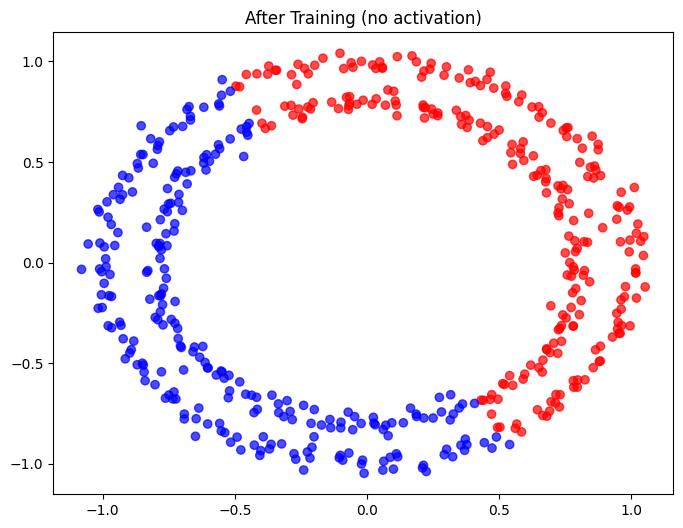

Accuracy: 0.502


In [8]:
final = [model_lin((Value(x[0]), Value(x[1]))) for x in xs]
final_preds = [np.argmax([p.data for p in pred]) for pred in final]

plt.figure(figsize=(8,6))
plt.scatter(xs[:,0], xs[:,1], c=final_preds, cmap='bwr', alpha=0.7)
plt.title("After Training (no activation)")
plt.show()

accuracy = np.mean(final_preds == ys)
print(f"Accuracy: {accuracy}")

In [ ]:
# Initializing model with ReLU activation
random.seed(SEED)
model_relu = MLP(2, [32, 32, 2], activation="ReLU")
params_relu = model_relu.parameters()
optimizer = SGD(params_relu, lr=0.05)

preds = [model_relu([Value(xi) for xi in x]) for x in xs]
before_preds = [np.argmax([p.data for p in pred]) for pred in preds]

plt.figure(figsize=(8,6))
plt.scatter(xs[:,0], xs[:,1], c=before_preds, cmap='bwr', alpha=0.7)
plt.title("Before Training (ReLU activation)")
plt.show()

accuracy = np.mean(before_preds == ys)
print(f"Accuracy: {accuracy}")

In [11]:
# Training loop
for epoch in range(100):
    preds = [model_relu([Value(xi) for xi in x]) for x in xs]
    loss = ce_loss(preds, ys)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    print(f"Epoch: {epoch} || Loss: {loss.data}")
    if epoch % 10 == 0:
        accuracy = np.mean([np.argmax([p.data for p in pred]) for pred in preds] == ys)
        print(f"Accuracy: {accuracy}")

Epoch: 0 || Loss: 2.3912781772982292
Accuracy: 0.5
Epoch: 1 || Loss: 1.9554481113266688
Epoch: 2 || Loss: 1.5841332195703035
Epoch: 3 || Loss: 1.2824252542554218
Epoch: 4 || Loss: 1.0535150215298543
Epoch: 5 || Loss: 0.9060024529843139
Epoch: 6 || Loss: 0.8228753241489676
Epoch: 7 || Loss: 0.7775805907973905
Epoch: 8 || Loss: 0.7512386636746609
Epoch: 9 || Loss: 0.7348741158638299
Epoch: 10 || Loss: 0.72388616805625
Accuracy: 0.51
Epoch: 11 || Loss: 0.7158129877993897
Epoch: 12 || Loss: 0.7095136282176259
Epoch: 13 || Loss: 0.7041228540356604
Epoch: 14 || Loss: 0.6993107421898176
Epoch: 15 || Loss: 0.6949410043564399
Epoch: 16 || Loss: 0.6909715262698214
Epoch: 17 || Loss: 0.6874527018446452
Epoch: 18 || Loss: 0.6841554310589559
Epoch: 19 || Loss: 0.680977566655497
Epoch: 20 || Loss: 0.6777882230595815
Accuracy: 0.522
Epoch: 21 || Loss: 0.6745445289456494
Epoch: 22 || Loss: 0.6714746528719453
Epoch: 23 || Loss: 0.6688215775324905
Epoch: 24 || Loss: 0.6664602882420159
Epoch: 25 || Loss:

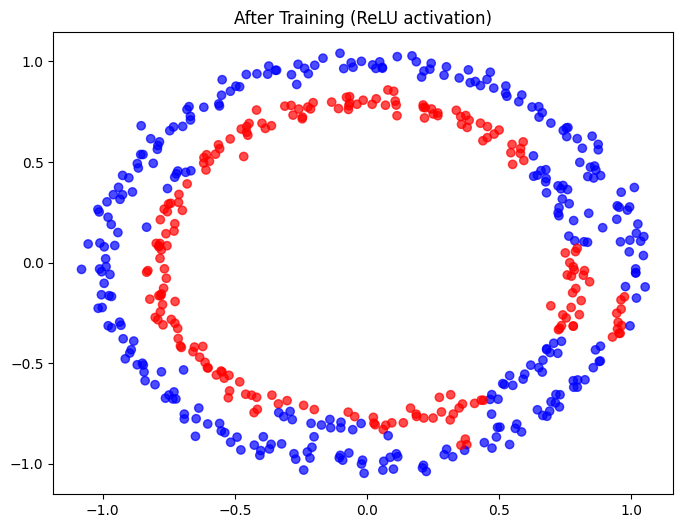

Accuracy: 0.844


In [12]:
final = [model_relu((Value(x[0]), Value(x[1]))) for x in xs]
final_preds = [np.argmax([p.data for p in pred]) for pred in final]

plt.figure(figsize=(8,6))
plt.scatter(xs[:,0], xs[:,1], c=final_preds, cmap='bwr', alpha=0.7)
plt.title("After Training (ReLU activation)")
plt.show()

accuracy = np.mean(final_preds == ys)
print(f"Accuracy: {accuracy}")

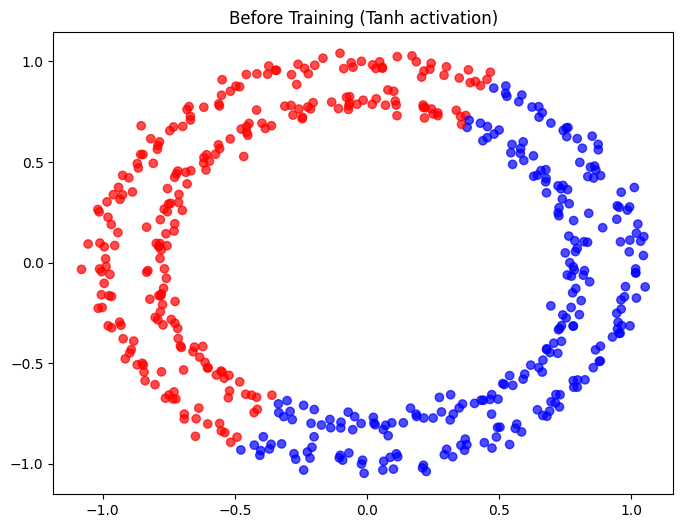

Accuracy: 0.502


In [ ]:
# Initializing model with Tanh activation
random.seed(SEED)
model_tanh = MLP(2, [32, 32, 2], "tanh")
tanh_params = model_tanh.parameters()
optimizer = SGD(tanh_params, lr=0.05)

preds = [model_tanh([Value(xi) for xi in x]) for x in xs]
before_preds = [np.argmax([p.data for p in pred]) for pred in preds]

plt.figure(figsize=(8,6))
plt.scatter(xs[:,0], xs[:,1], c=before_preds, cmap='bwr', alpha=0.7)
plt.title("Before Training (Tanh activation)")
plt.show()

accuracy = np.mean(before_preds == ys)
print(f"Accuracy: {accuracy}")

In [14]:
# Training loop
for epoch in range(100):
    preds = [model_tanh([Value(xi) for xi in x]) for x in xs]
    loss = ce_loss(preds, ys)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    print(f"Epoch: {epoch} || Loss: {loss.data}")
    if epoch % 10 == 0:
        accuracy = np.mean([np.argmax([p.data for p in pred]) for pred in preds] == ys)
        print(f"Accuracy: {accuracy}")

Epoch: 0 || Loss: 1.3208444307278047
Accuracy: 0.502
Epoch: 1 || Loss: 1.0359498451083509
Epoch: 2 || Loss: 0.8469842833753587
Epoch: 3 || Loss: 0.7572345110598372
Epoch: 4 || Loss: 0.7264464946936482
Epoch: 5 || Loss: 0.7165331676158696
Epoch: 6 || Loss: 0.7120698028047772
Epoch: 7 || Loss: 0.7089904942954662
Epoch: 8 || Loss: 0.706386950867877
Epoch: 9 || Loss: 0.7040537767654874
Epoch: 10 || Loss: 0.7019310612418806
Accuracy: 0.512
Epoch: 11 || Loss: 0.6999895240429372
Epoch: 12 || Loss: 0.6982076285664754
Epoch: 13 || Loss: 0.6965669685707061
Epoch: 14 || Loss: 0.6950512304808905
Epoch: 15 || Loss: 0.6936458618252473
Epoch: 16 || Loss: 0.6923378862823517
Epoch: 17 || Loss: 0.6911157544078286
Epoch: 18 || Loss: 0.6899692076354158
Epoch: 19 || Loss: 0.6888891512708901
Epoch: 20 || Loss: 0.687867535992426
Accuracy: 0.57
Epoch: 21 || Loss: 0.6868972480430158
Epoch: 22 || Loss: 0.6859720082540072
Epoch: 23 || Loss: 0.6850862798474575
Epoch: 24 || Loss: 0.6842351847784628
Epoch: 25 || Lo

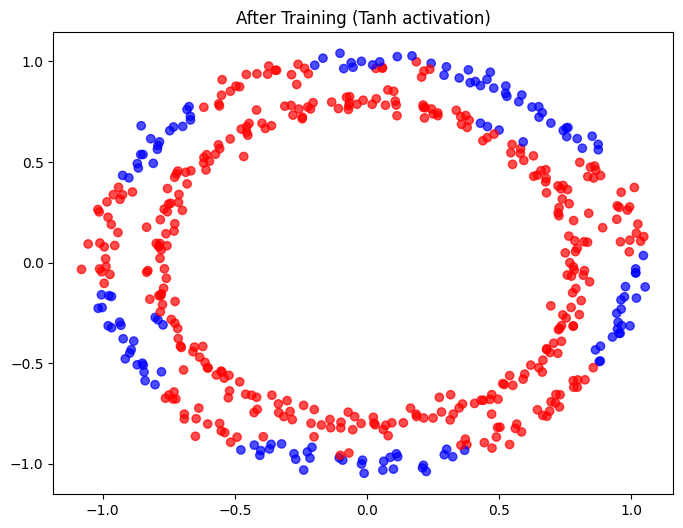

Accuracy: 0.754


In [16]:
preds = [model_tanh([Value(xi) for xi in x]) for x in xs]
final_preds = [np.argmax([p.data for p in pred]) for pred in preds]

plt.figure(figsize=(8,6))
plt.scatter(xs[:,0], xs[:,1], c=final_preds, cmap='bwr', alpha=0.7)
plt.title("After Training (Tanh activation)")
plt.show()

accuracy = np.mean(final_preds == ys)
print(f"Accuracy: {accuracy}")